# WeatherPy
----

Weather API Analysis by Carter Alvarez


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

OBSERVABLE TRENDS
1. Latitude does not seem to have a very strong relationship with wind speed across both sides of the equator. There are other factors not accounted for here that have a bigger relationship with wind speed
2. The strongest relationships were with max temp and latitude, with the highest R2 values of all of our tests. this makes sense because temperatures are heavily based on location throughout the world and how the sun hits each place. 
3. There was a stronger correlation between cloudiness and latitude in the southern hemishphere, but the cloudiest areas seemed to be around the equator from this test, where it tends to be the most humid as well. 

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import modules needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Import citypy
from citipy import citipy

# create the output file 
output_data_file = "output_data/cities.csv"

#Create the range for latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#Create holdings for longitude and latitude
latitude_longitude = []
cities = []

# Create a set longitude and latitude conditions
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
latitude_longitude = zip(latitudes, longitudes)

#Designate the city 
for latitude_longitude in latitude_longitude:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print cities
len(cities)

620

In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
latitude_list = []
longitude_list = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
print("Weather Data Retrieval")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude_list.append(response["coord"]["lat"])
        longitude_list.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Weather Data Retrieval
-----------------------------
Processing Record 1 of Set 1 : bredasdorp
Processing Record 2 of Set 1 : saint marys
Processing Record 3 of Set 1 : husavik
Processing Record 4 of Set 1 : kununurra
Processing Record 5 of Set 1 : ushuaia
Processing Record 6 of Set 1 : kaitangata
Processing Record 7 of Set 1 : olafsvik
Processing Record 8 of Set 1 : avarua
Processing Record 9 of Set 1 : jamestown
City not found. Skipping...
Processing Record 10 of Set 1 : pisco
Processing Record 11 of Set 1 : bengkulu
Processing Record 12 of Set 1 : hasaki
Processing Record 13 of Set 1 : wattegama
Processing Record 14 of Set 1 : saint-philippe
Processing Record 15 of Set 1 : vanavara
Processing Record 16 of Set 1 : mataura
Processing Record 17 of Set 1 : muros
Processing Record 18 of Set 1 : puerto ayora
Processing Record 19 of Set 1 : kokopo
City not found. Skipping...
Processing Record 20 of Set 1 : east london
Processing Record 21 of Set 1 : busselton
Processing Record 22 of Set 1 

Processing Record 34 of Set 4 : kristiansund
Processing Record 35 of Set 4 : murray bridge
Processing Record 36 of Set 4 : norman wells
Processing Record 37 of Set 4 : waipawa
Processing Record 38 of Set 4 : bambous virieux
Processing Record 39 of Set 4 : cabo san lucas
Processing Record 40 of Set 4 : sao borja
Processing Record 41 of Set 4 : kilindoni
Processing Record 42 of Set 4 : topolobampo
Processing Record 43 of Set 4 : turukhansk
Processing Record 44 of Set 4 : taybad
City not found. Skipping...
Processing Record 45 of Set 4 : bolshoye nagatkino
Processing Record 46 of Set 4 : poum
Processing Record 47 of Set 4 : broken hill
Processing Record 48 of Set 4 : faanui
Processing Record 49 of Set 4 : pacific grove
Processing Record 50 of Set 4 : porto novo
Processing Record 0 of Set 5 : klaksvik
City not found. Skipping...
Processing Record 1 of Set 5 : mapiri
Processing Record 2 of Set 5 : mandalgarh
Processing Record 3 of Set 5 : faya
Processing Record 4 of Set 5 : nyalikungu
City 

Processing Record 16 of Set 8 : whitianga
Processing Record 17 of Set 8 : muli
Processing Record 18 of Set 8 : haines junction
Processing Record 19 of Set 8 : ko samui
Processing Record 20 of Set 8 : katobu
Processing Record 21 of Set 8 : tabou
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 8 : mont-de-marsan
Processing Record 23 of Set 8 : rantepao
Processing Record 24 of Set 8 : rio grande
Processing Record 25 of Set 8 : lifford
Processing Record 26 of Set 8 : amapa
Processing Record 27 of Set 8 : atasu
Processing Record 28 of Set 8 : okhotsk
Processing Record 29 of Set 8 : pontes e lacerda
Processing Record 30 of Set 8 : la asuncion
Processing Record 31 of Set 8 : teahupoo
Processing Record 32 of Set 8 : mount isa
City not found. Skipping...
Processing Record 33 of Set 8 : kastamonu
Processing Record 34 of Set 8 : belousovka
Processing Record 35 of Set 8 : dossor
Processing Record 36 of Set 8 : kokstad
City not found. Skipping...
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
# Create the data frame for our weather data
weather_data_df = pd.DataFrame({ 
                "Country" : country,
                "City" : city_name,
                "Latitude" : latitude_list,
                "Longitude" : longitude_list,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Date" : date,    
                
})

In [82]:
# Count data
weather_data_df.count()

Country       564
City          564
Latitude      564
Longitude     564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Date          564
dtype: int64

In [83]:
#Display the Data Frame
weather_data_df.head()

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,AF,Nuristan,35.30,70.83,27.59,86,0,7.34,1602704708
1,ZA,Hermanus,-34.42,19.23,61.00,74,0,5.01,1602704708
2,AR,Ushuaia,-54.80,-68.30,48.20,57,40,12.75,1602704691
3,GL,Qaanaaq,77.48,-69.36,30.56,85,45,6.87,1602704709
4,PF,Rikitea,-23.12,-134.97,73.63,80,27,19.46,1602704419


In [84]:
# Save city data into a csv file
weather_data_df.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

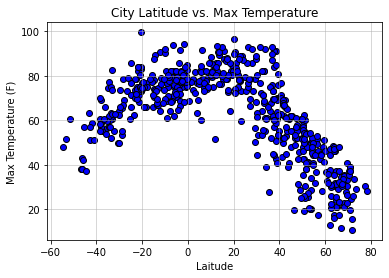

In [67]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temp"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

Here, around latitude 0-20, if it increases or decreases around that section the temp increases or decreases depending on what side of the equator you are on. 

## Latitude vs. Humidity Plot

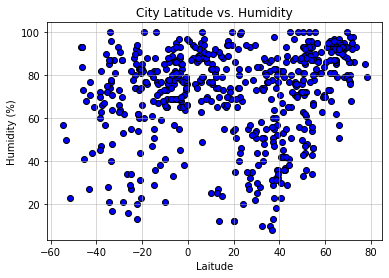

In [68]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

As latitude increases, humidity increases in the southern hemisphere

## Latitude vs. Cloudiness Plot

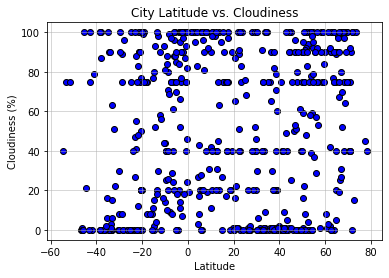

In [69]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

Cloudiness seems to be very spread out and latitude has a low overall effect on the cloudiness

## Latitude vs. Wind Speed Plot

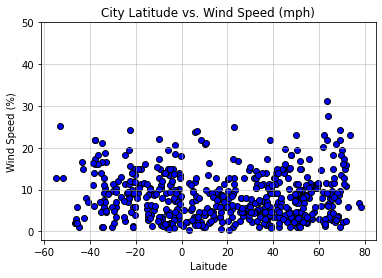

In [70]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

In [ ]:
latitude doesnt seem to have a big correlation to wind speed across the world

## Linear Regression

In [100]:
# Create the data frames for northern and southern hemishphere
northern_hemisphere = weather_data_df.loc[weather_data_df["Latitude"] >= 0]
southern_hemisphere = weather_data_df.loc[weather_data_df["Latitude"] < 0]

In [101]:
# Define function properties for our regression
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
   


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.83


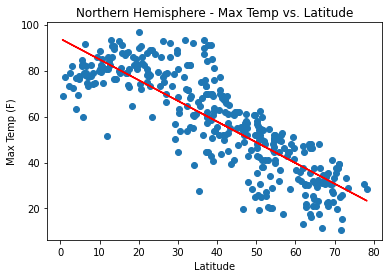

In [102]:
# Create the function 
function_one = linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Max Temp"])

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.7


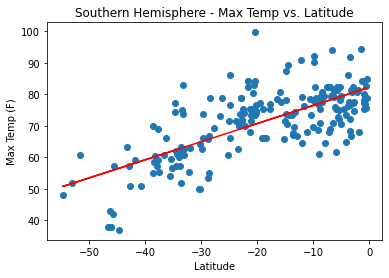

In [103]:
# Create the function
function_two = linear_regression(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude.png")

There is a strong postive correlation in the southern hemisphere between Latitude and Max Temperature

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.19


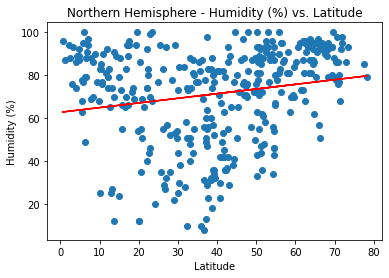

In [104]:
#Create the function
function_three = linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude.png")

There seems to be a slight positive correlation between humidity and latitude in the northern hemishphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.19


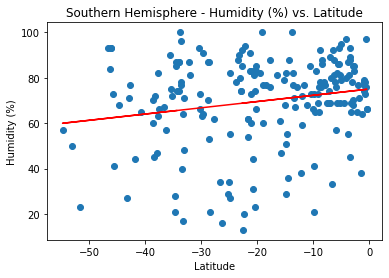

In [105]:
#Create the function
function_four = linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude.png")

Although it appears to have a slight positive correlation from the R squared, its not a very strong regression model. However you could infer there is a slight positive correlation in the southern hemisphere between humidity and latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.11


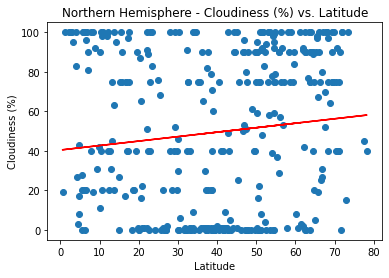

In [106]:
# Create the function 
function_five = linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

Rather than looking at just the R2 value which is weak (but positive nontheless), by looking at the data distrobution there isnt a strong correlation either way for this model. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.3


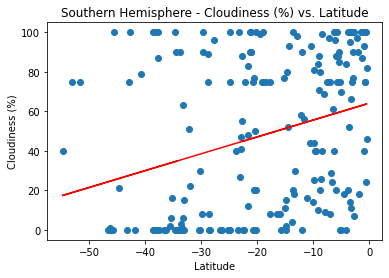

In [107]:
# Call an function #1
function_six = linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

We can tell there is a positive correlation between cloudiness and latitude in the southern equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.17


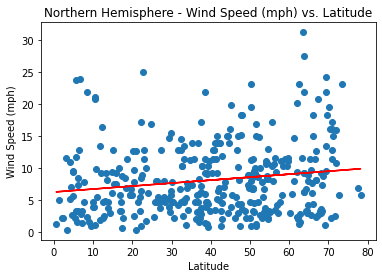

In [108]:
# Create the function
function_seven = linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed"])

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude.png")

There is a slight positive correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.12


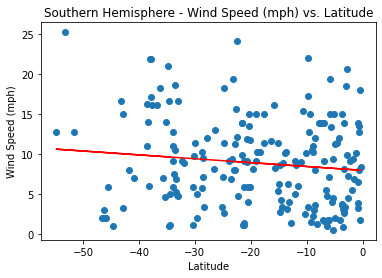

In [109]:
# Create the function
function_eight = linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed"])

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude.png")

There seems to be a negative correlation between wind speed and latitude in the southern hemisphere. 